In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [46]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')


In [47]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban,Y


In [48]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002648,Male,Yes,0,Graduate,No,2130,6666,70.0,180,1.0,Semiurban,N
1,LP002652,Male,No,0,Graduate,No,5815,3666,311.0,360,1.0,Rural,N
2,LP002659,Male,Yes,3+,Graduate,No,3466,3428,150.0,360,1.0,Rural,Y
3,LP002670,Female,Yes,2,Graduate,No,2031,1632,113.0,480,1.0,Semiurban,Y
4,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800,123.0,360,0.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,LP002978,Female,No,0,Graduate,No,2900,0,71.0,360,1.0,Rural,Y
97,LP002979,Male,Yes,3+,Graduate,No,4106,0,40.0,180,1.0,Rural,Y
98,LP002983,Male,Yes,1,Graduate,No,8072,240,253.0,360,1.0,Urban,Y
99,LP002984,Male,Yes,2,Graduate,No,7583,0,187.0,360,1.0,Urban,Y


In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            513 non-null    object 
 1   Gender             503 non-null    object 
 2   Married            510 non-null    object 
 3   Dependents         501 non-null    object 
 4   Education          513 non-null    object 
 5   Self_Employed      486 non-null    object 
 6   ApplicantIncome    513 non-null    int64  
 7   CoapplicantIncome  513 non-null    float64
 8   LoanAmount         495 non-null    float64
 9   Loan_Amount_Term   499 non-null    float64
 10  Credit_History     470 non-null    float64
 11  Property_Area      513 non-null    object 
 12  Loan_Status        513 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ KB


In [68]:
# Define columns based on data types
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [70]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [72]:
# Apply preprocessing to the training data
X_train = preprocessor.fit_transform(train_data.drop('Loan_Status', axis=1))
y_train = train_data['Loan_Status']

In [73]:
# Apply the same preprocessing to the test data
X_test = preprocessor.transform(test_data)

c:\Users\AhMeD_RaFiQuE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


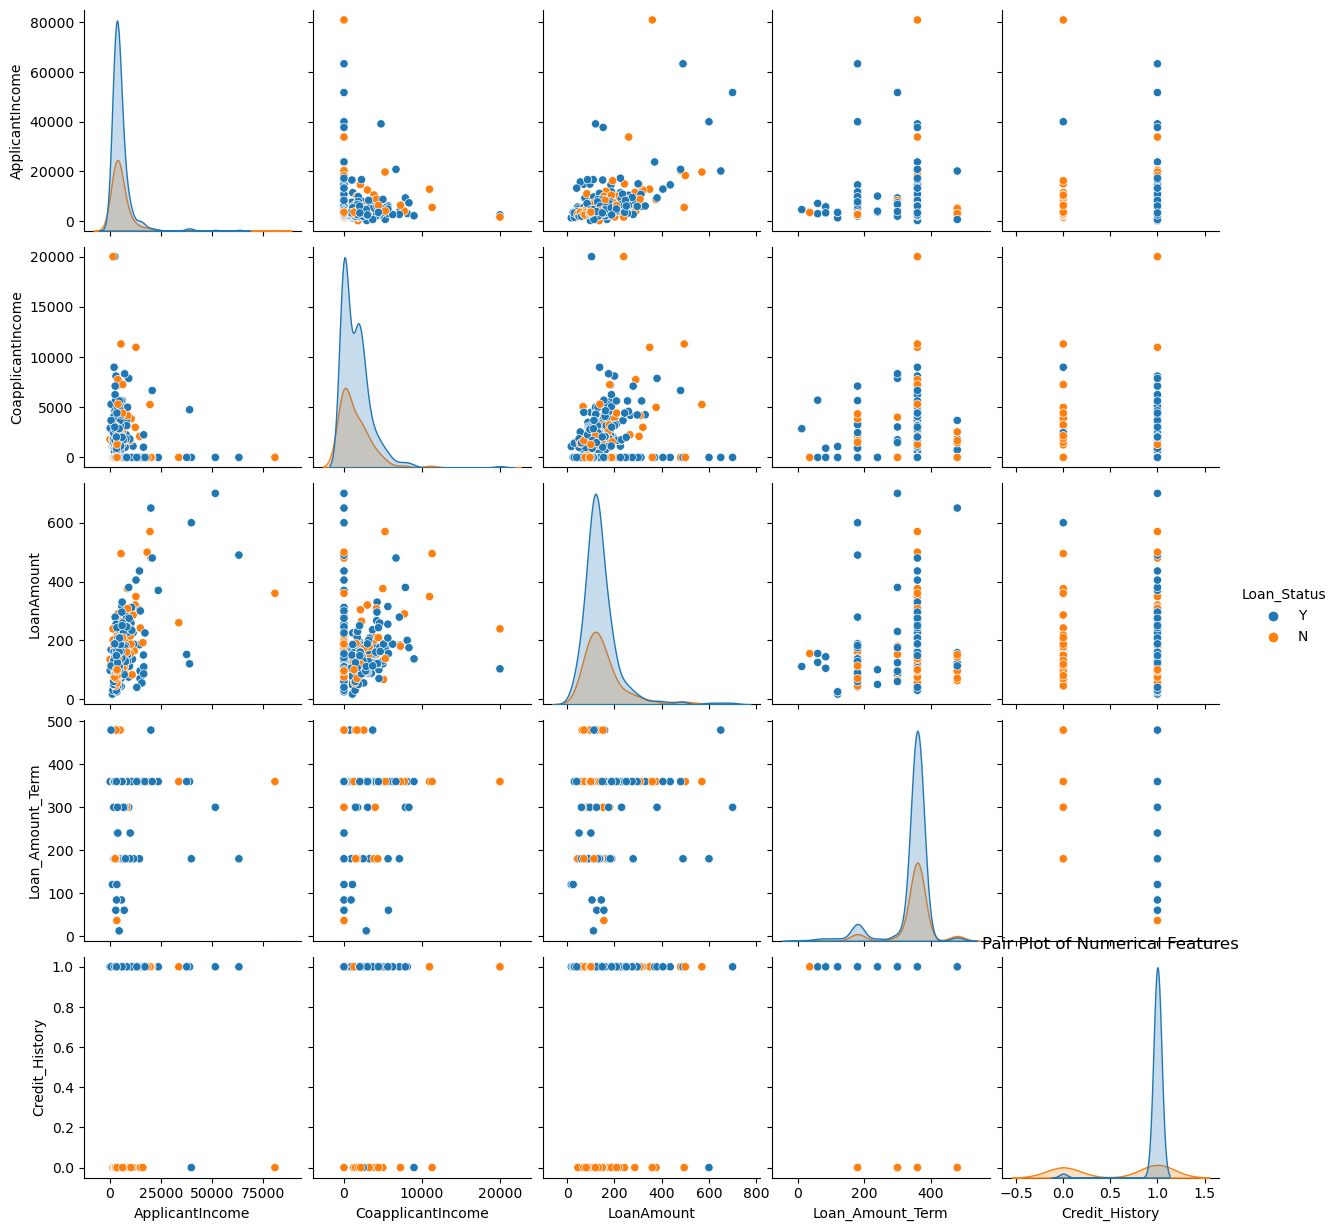

In [74]:
# Pair plot for numerical features
sns.pairplot(train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']], hue='Loan_Status')
plt.title('Pair Plot of Numerical Features')
plt.show()

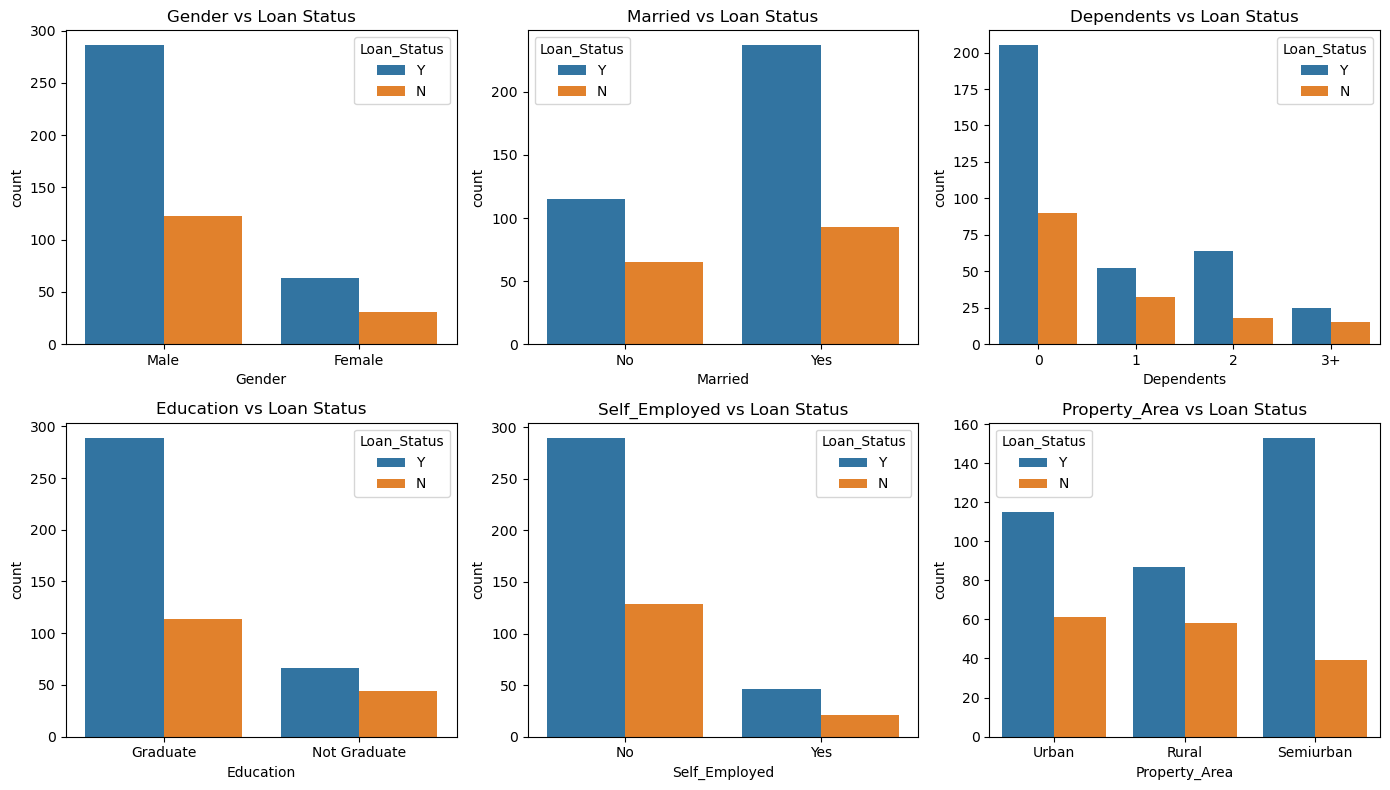

In [75]:
# Bar chart for categorical features and Loan_Status
plt.figure(figsize=(14, 8))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=feature, hue='Loan_Status', data=train_data)
    plt.title(f'{feature} vs Loan Status')
plt.tight_layout()
plt.show()

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [77]:
# Create and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [78]:
model.score(X_train, y_train)

0.802439024390244

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.82
Confusion Matrix:
[[13 18]
 [ 1 71]]
Classification Report:
              precision    recall  f1-score   support

           N       0.93      0.42      0.58        31
           Y       0.80      0.99      0.88        72

    accuracy                           0.82       103
   macro avg       0.86      0.70      0.73       103
weighted avg       0.84      0.82      0.79       103



In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [87]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_val)

In [88]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_val)

In [89]:
# Support Vector Machine (SVM) Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_val)

In [90]:
# Evaluate the models
def evaluate_model(model, y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred)
    
    print(f'\n{model_name} Results:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{classification_rep}')


In [91]:
# Evaluate Decision Tree Classifier
evaluate_model(dt_model, y_val, dt_y_pred, 'Decision Tree')



Decision Tree Results:
Accuracy: 0.72
Confusion Matrix:
[[17 14]
 [15 57]]
Classification Report:
              precision    recall  f1-score   support

           N       0.53      0.55      0.54        31
           Y       0.80      0.79      0.80        72

    accuracy                           0.72       103
   macro avg       0.67      0.67      0.67       103
weighted avg       0.72      0.72      0.72       103



In [92]:
# Evaluate Random Forest Classifier
evaluate_model(rf_model, y_val, rf_y_pred, 'Random Forest')



Random Forest Results:
Accuracy: 0.80
Confusion Matrix:
[[15 16]
 [ 5 67]]
Classification Report:
              precision    recall  f1-score   support

           N       0.75      0.48      0.59        31
           Y       0.81      0.93      0.86        72

    accuracy                           0.80       103
   macro avg       0.78      0.71      0.73       103
weighted avg       0.79      0.80      0.78       103



In [93]:
# Evaluate Support Vector Machine (SVM) Classifier
evaluate_model(svm_model, y_val, svm_y_pred, 'Support Vector Machine')


Support Vector Machine Results:
Accuracy: 0.82
Confusion Matrix:
[[12 19]
 [ 0 72]]
Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.39      0.56        31
           Y       0.79      1.00      0.88        72

    accuracy                           0.82       103
   macro avg       0.90      0.69      0.72       103
weighted avg       0.85      0.82      0.79       103

